In [1]:
import pandas as pd

In [2]:
path = "C:/Users/eliza/Documents/Semester V/Sentiment Analysis/text_preprocessed_healthcare.csv"
text_df = pd.read_csv(path)
text_df

,Unnamed: 0,user_id,user_name,rating,text,gmap_id,business_name,text_length,cleaned_translated_text,nltk_sentence_tokenized,nltk_word_tokenized_from_sentences,nltk_lowercased_tokens,nltk_no_punctuation_tokens,nltk_pos_tagged_tokens,nltk_lemmatized_tokens,nltk_no_stopwords_tokens,nltk_final_cleaned_text
0,0,1.168913e+20,Andrew,5.0,I was shocked when I saw PW had a 2.7 star ave...,0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center,57,I was shocked when I saw PW had a 2.7 star ave...,['I was shocked when I saw PW had a 2.7 star a...,"[['I', 'was', 'shocked', 'when', 'I', 'saw', '...","[['i', 'was', 'shocked', 'when', 'i', 'saw', '...","[['i', 'was', 'shocked', 'when', 'i', 'saw', '...","[[('i', 'NN'), ('was', 'VBD'), ('shocked', 'VB...","[['i', 'be', 'shock', 'when', 'i', 'saw', 'pw'...","[['shock', 'saw', 'pw', '2.7', 'star', 'averag...",shock saw pw 2.7 star average rating come past...
1,1,1.065142e+20,Oakley Davis,5.0,My experience at Pat Walker was a very good on...,0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center,55,My experience at Pat Walker was a very good on...,['My experience at Pat Walker was a very good ...,"[['My', 'experience', 'at', 'Pat', 'Walker', '...","[['my', 'experience', 'at', 'pat', 'walker', '...","[['my', 'experience', 'at', 'pat', 'walker', '...","[[('my', 'PRP$'), ('experience', 'NN'), ('at',...","[['my', 'experience', 'at', 'pat', 'walker', '...","[['experience', 'pat', 'walker', 'good', 'one'...",experience pat walker good one dr. beck extrem...
2,2,1.089844e+20,sam Rami,1.0,"Here is what they do, you schedule an appointm...",0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center,53,"Here is what they do, you schedule an appointm...","['Here is what they do, you schedule an appoin...","[['Here', 'is', 'what', 'they', 'do', ',', 'yo...","[['here', 'is', 'what', 'they', 'do', ',', 'yo...","[['here', 'is', 'what', 'they', 'do', 'you', '...","[[('here', 'RB'), ('is', 'VBZ'), ('what', 'WP'...","[['here', 'be', 'what', 'they', 'do', 'you', '...","[['schedule', 'appointment', 'late', '10min', ...",schedule appointment late 10min ever reason ch...
3,3,1.000681e+20,Katie McGuffin,5.0,"I’ve been here twice, once for STD testing, an...",0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center,62,"I’ve been here twice, once for STD testing, an...","['I’ve been here twice, once for STD testing, ...","[['I', '’', 've', 'been', 'here', 'twice', ','...","[['i', '’', 've', 'been', 'here', 'twice', ','...","[['i', '’', 've', 'been', 'here', 'twice', 'on...","[[('i', 'NN'), ('’', 'VBP'), ('ve', 'NN'), ('b...","[['i', '’', 've', 'be', 'here', 'twice', 'once...","[['’', 'twice', 'std', 'testing', 'iud'], ['sa...",’ twice std testing iud saw two different doct...
4,4,1.011815e+20,Dene Wamsley,2.0,I've had very mixed experiences with Pat Walke...,0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center,395,I've had very mixed experiences with Pat Walke...,"[""I've had very mixed experiences with Pat Wal...","[['I', ""'ve"", 'had', 'very', 'mixed', 'experie...","[['i', ""'ve"", 'had', 'very', 'mixed', 'experie...","[['i', ""'ve"", 'had', 'very', 'mixed', 'experie...","[[('i', 'NN'), (""'ve"", 'VBP'), ('had', 'VBN'),...","[['i', ""'ve"", 'have', 'very', 'mixed', 'experi...","[[""'ve"", 'mixed', 'experience', 'pat', 'walker...",'ve mixed experience pat walker n't felt urge ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296282,296282,1.009026e+20,Mark S,1.0,Brought my dog in on a Friday because he was v...,0x8626ba564f365f59:0x7e6e5bdbec491a49,Azalea Lakes Veterinary Clinic,278,Brought my dog in on a Friday because he was v...,['Brought my dog in on a Friday because he was...,"[['Brought', 'my', 'dog', 'in', 'on', 'a', 'Fr...","[['brought', 'my', 'dog', 'in', 'on', 'a', 'fr...","[['brought', 'my', 'dog', 'in', 'on', 'a', 'fr...","[[('brought', 'VBN'), ('my', 'PRP$'), ('dog', ...","[['bring', 'my', 'dog', 'in', 'on', 'a', 'frid...","[['bring', 'dog', 'fri

In [4]:
#drop column unnamed
# Drop the 'Unnamed: 0' column if it exists
text_df = text_df.drop(columns=['Unnamed: 0'], errors='ignore')


In [ ]:
text_df.shape

## **DATA UNDERSTANDING**

**see rating distribution**


In [5]:
text_df['rating'].value_counts(normalize=True)

rating
5.0    0.636140
1.0    0.278200
2.0    0.044899
4.0    0.029785
3.0    0.010976
Name: proportion, dtype: float64

**visualize rating distribution**

In [ ]:
#%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\eliza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'count pf reviews by rating')

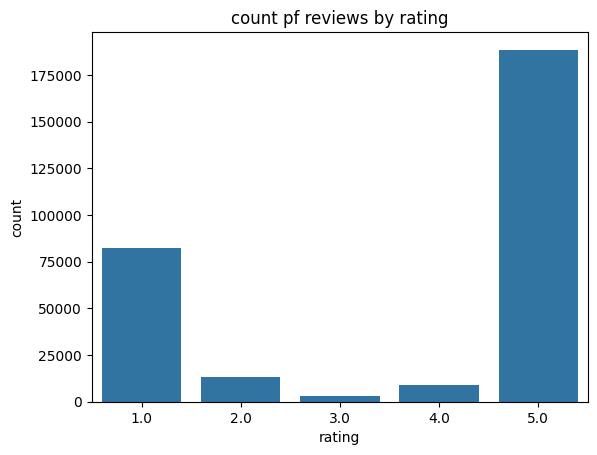

In [ ]:
sns.countplot(data=text_df, x='rating')
plt.title('count of reviews by rating')

**count review character length after the words have been cleaned (translated text)**

In [10]:
text_df['char_count'] = text_df['cleaned_translated_text'].apply(len)
text_df

,user_id,user_name,rating,text,gmap_id,business_name,text_length,cleaned_translated_text,nltk_sentence_tokenized,nltk_word_tokenized_from_sentences,nltk_lowercased_tokens,nltk_no_punctuation_tokens,nltk_pos_tagged_tokens,nltk_lemmatized_tokens,nltk_no_stopwords_tokens,nltk_final_cleaned_text,char_count
0,1.168913e+20,Andrew,5.0,I was shocked when I saw PW had a 2.7 star ave...,0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center,57,I was shocked when I saw PW had a 2.7 star ave...,['I was shocked when I saw PW had a 2.7 star a...,"[['I', 'was', 'shocked', 'when', 'I', 'saw', '...","[['i', 'was', 'shocked', 'when', 'i', 'saw', '...","[['i', 'was', 'shocked', 'when', 'i', 'saw', '...","[[('i', 'NN'), ('was', 'VBD'), ('shocked', 'VB...","[['i', 'be', 'shock', 'when', 'i', 'saw', 'pw'...","[['shock', 'saw', 'pw', '2.7', 'star', 'averag...",shock saw pw 2.7 star average rating come past...,322
1,1.065142e+20,Oakley Davis,5.0,My experience at Pat Walker was a very good on...,0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center,55,My experience at Pat Walker was a very good on...,['My experience at Pat Walker was a very good ...,"[['My', 'experience', 'at', 'Pat', 'Walker', '...","[['my', 'experience', 'at', 'pat', 'walker', '...","[['my', 'experience', 'at', 'pat', 'walker', '...","[[('my', 'PRP$'), ('experience', 'NN'), ('at',...","[['my', 'experience', 'at', 'pat', 'walker', '...","[['experience', 'pat', 'walker', 'good', 'one'...",experience pat walker good one dr. beck extrem...,327
2,1.089844e+20,sam Rami,1.0,"Here is what they do, you schedule an appointm...",0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center,53,"Here is what they do, you schedule an appointm...","['Here is what they do, you schedule an appoin...","[['Here', 'is', 'what', 'they', 'do', ',', 'yo...","[['here', 'is', 'what', 'they', 'do', ',', 'yo...","[['here', 'is', 'what', 'they', 'do', 'you', '...","[[('here', 'RB'), ('is', 'VBZ'), ('what', 'WP'...","[['here', 'be', 'what', 'they', 'do', 'you', '...","[['schedule', 'appointment', 'late', '10min', ...",schedule appointment late 10min ever reason ch...,274
3,1.000681e+20,Katie McGuffin,5.0,"I’ve been here twice, once for STD testing, an...",0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center,62,"I’ve been here twice, once for STD testing, an...","['I’ve been here twice, once for STD testing, ...","[['I', '’', 've', 'been', 'here', 'twice', ','...","[['i', '’', 've', 'been', 'here', 'twice', ','...","[['i', '’', 've', 'been', 'here', 'twice', 'on...","[[('i', 'NN'), ('’', 'VBP'), ('ve', 'NN'), ('b...","[['i', '’', 've', 'be', 'here', 'twice', 'once...","[['’', 'twice', 'std', 'testing', 'iud'], ['sa...",’ twice std testing iud saw two different doct...,331
4,1.011815e+20,Dene Wamsley,2.0,I've had very mixed experiences with Pat Walke...,0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center,395,I've had very mixed experiences with Pat Walke...,"[""I've had very mixed experiences with Pat Wal...","[['I', ""'ve"", 'had', 'very', 'mixed', 'experie...","[['i', ""'ve"", 'had', 'very', 'mixed', 'experie...","[['i', ""'ve"", 'had', 'very', 'mixed', 'experie...","[[('i', 'NN'), (""'ve"", 'VBP'), ('had', 'VBN'),...","[['i', ""'ve"", 'have', 'very', 'mixed', 'experi...","[[""'ve"", 'mixed', 'experience', 'pat', 'walker...",'ve mixed experience pat walker n't felt urge ...,2209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296282,1.009026e+20,Mark S,1.0,Brought my dog in on a Friday because he was v...,0x8626ba564f365f59:0x7e6e5bdbec491a49,Azalea Lakes Veterinary Clinic,278,Brought my dog in on a Friday because he was v...,['Brought my dog in on a Friday because he was...,"[['Brought', 'my', 'dog', 'in', 'on', 'a', 'Fr...","[['brought', 'my', 'dog', 'in', 'on', 'a', 'fr...","[['brought', 'my', 'dog', 'in', 'on', 'a', 'fr...","[[('brought', 'VBN'), ('my', 'PRP$'), ('dog', ...","[['bring', 'my', 'dog', 'in', 'on', 'a', 'frid...","[['bring', 'dog', 

In [11]:
text_df.columns

Index(['user_id', 'user_name', 'rating', 'text', 'gmap_id', 'business_name',
       'text_length', 'cleaned_translated_text', 'nltk_sentence_tokenized',
       'nltk_word_tokenized_from_sentences', 'nltk_lowercased_tokens',
       'nltk_no_punctuation_tokens', 'nltk_pos_tagged_tokens',
       'nltk_lemmatized_tokens', 'nltk_no_stopwords_tokens',
       'nltk_final_cleaned_text', 'char_count'],
      dtype='object')

**count word in a text**

In [12]:
# Create a new column to store word counts
text_df['cleaned_word_count'] = text_df['text'].apply(lambda x: len(str(x).split()))


In [13]:
text_df

,user_id,user_name,rating,text,gmap_id,business_name,text_length,cleaned_translated_text,nltk_sentence_tokenized,nltk_word_tokenized_from_sentences,nltk_lowercased_tokens,nltk_no_punctuation_tokens,nltk_pos_tagged_tokens,nltk_lemmatized_tokens,nltk_no_stopwords_tokens,nltk_final_cleaned_text,char_count,cleaned_word_count
0,1.168913e+20,Andrew,5.0,I was shocked when I saw PW had a 2.7 star ave...,0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center,57,I was shocked when I saw PW had a 2.7 star ave...,['I was shocked when I saw PW had a 2.7 star a...,"[['I', 'was', 'shocked', 'when', 'I', 'saw', '...","[['i', 'was', 'shocked', 'when', 'i', 'saw', '...","[['i', 'was', 'shocked', 'when', 'i', 'saw', '...","[[('i', 'NN'), ('was', 'VBD'), ('shocked', 'VB...","[['i', 'be', 'shock', 'when', 'i', 'saw', 'pw'...","[['shock', 'saw', 'pw', '2.7', 'star', 'averag...",shock saw pw 2.7 star average rating come past...,322,57
1,1.065142e+20,Oakley Davis,5.0,My experience at Pat Walker was a very good on...,0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center,55,My experience at Pat Walker was a very good on...,['My experience at Pat Walker was a very good ...,"[['My', 'experience', 'at', 'Pat', 'Walker', '...","[['my', 'experience', 'at', 'pat', 'walker', '...","[['my', 'experience', 'at', 'pat', 'walker', '...","[[('my', 'PRP$'), ('experience', 'NN'), ('at',...","[['my', 'experience', 'at', 'pat', 'walker', '...","[['experience', 'pat', 'walker', 'good', 'one'...",experience pat walker good one dr. beck extrem...,327,55
2,1.089844e+20,sam Rami,1.0,"Here is what they do, you schedule an appointm...",0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center,53,"Here is what they do, you schedule an appointm...","['Here is what they do, you schedule an appoin...","[['Here', 'is', 'what', 'they', 'do', ',', 'yo...","[['here', 'is', 'what', 'they', 'do', ',', 'yo...","[['here', 'is', 'what', 'they', 'do', 'you', '...","[[('here', 'RB'), ('is', 'VBZ'), ('what', 'WP'...","[['here', 'be', 'what', 'they', 'do', 'you', '...","[['schedule', 'appointment', 'late', '10min', ...",schedule appointment late 10min ever reason ch...,274,53
3,1.000681e+20,Katie McGuffin,5.0,"I’ve been here twice, once for STD testing, an...",0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center,62,"I’ve been here twice, once for STD testing, an...","['I’ve been here twice, once for STD testing, ...","[['I', '’', 've', 'been', 'here', 'twice', ','...","[['i', '’', 've', 'been', 'here', 'twice', ','...","[['i', '’', 've', 'been', 'here', 'twice', 'on...","[[('i', 'NN'), ('’', 'VBP'), ('ve', 'NN'), ('b...","[['i', '’', 've', 'be', 'here', 'twice', 'once...","[['’', 'twice', 'std', 'testing', 'iud'], ['sa...",’ twice std testing iud saw two different doct...,331,62
4,1.011815e+20,Dene Wamsley,2.0,I've had very mixed experiences with Pat Walke...,0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center,395,I've had very mixed experiences with Pat Walke...,"[""I've had very mixed experiences with Pat Wal...","[['I', ""'ve"", 'had', 'very', 'mixed', 'experie...","[['i', ""'ve"", 'had', 'very', 'mixed', 'experie...","[['i', ""'ve"", 'had', 'very', 'mixed', 'experie...","[[('i', 'NN'), (""'ve"", 'VBP'), ('had', 'VBN'),...","[['i', ""'ve"", 'have', 'very', 'mixed', 'experi...","[[""'ve"", 'mixed', 'experience', 'pat', 'walker...",'ve mixed experience pat walker n't felt urge ...,2209,395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296282,1.009026e+20,Mark S,1.0,Brought my dog in on a Friday because he was v...,0x8626ba564f365f59:0x7e6e5bdbec491a49,Azalea Lakes Veterinary Clinic,278,Brought my dog in on a Friday because he was v...,['Brought my dog in on a Friday because he was...,"[['Brought', 'my', 'dog', 'in', 'on', 'a', 'Fr...","[['brought', 'my', 'dog', 'in', 'on', 'a', 'fr...","[['brought', 'my', 'dog', 'in', 'on', 'a', 'fr...","[[('brought', 'VBN'), ('my', 'PRP$'), ('dog', ...","[['bring', 'my', 'dog', 'in', '

**visualize character count distribution based on the rating**

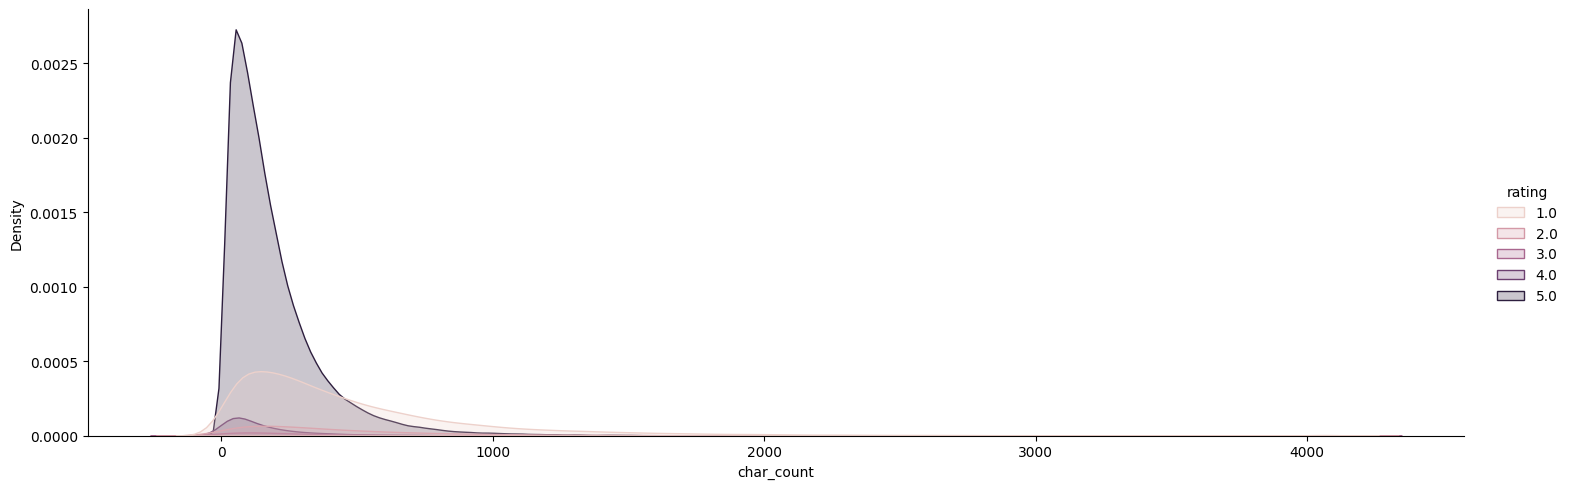

In [14]:
sns.displot(data = text_df, x = 'char_count', hue = 'rating', kind = 'kde',
            fill = True, aspect = 3)

**find most common words**

In [15]:
from collections import Counter

In [16]:
all_words = ' '.join(text_df['nltk_final_cleaned_text']).split()
word_counts = Counter(all_words)
top_words = word_counts.most_common(20)
print(top_words)

TypeError: sequence item 12105: expected str instance, float found

In [17]:
# Summarize the actual data types for each column
for col in text_df.columns:
    print(f"{col}: {set(type(x) for x in text_df[col])}")

user_id: {<class 'float'>}
user_name: {<class 'str'>}
rating: {<class 'float'>}
text: {<class 'str'>}
gmap_id: {<class 'str'>}
business_name: {<class 'str'>}
text_length: {<class 'int'>}
cleaned_translated_text: {<class 'str'>}
nltk_sentence_tokenized: {<class 'str'>}
nltk_word_tokenized_from_sentences: {<class 'str'>}
nltk_lowercased_tokens: {<class 'str'>}
nltk_no_punctuation_tokens: {<class 'str'>}
nltk_pos_tagged_tokens: {<class 'str'>}
nltk_lemmatized_tokens: {<class 'str'>}
nltk_no_stopwords_tokens: {<class 'str'>}
nltk_final_cleaned_text: {<class 'str'>, <class 'float'>}
char_count: {<class 'int'>}
cleaned_word_count: {<class 'int'>}


when i want to do word count, cannot because there is float  
need to change it into all string

In [18]:
text_df['nltk_final_cleaned_text'] = text_df['nltk_final_cleaned_text'].astype(str)

now repeat again

In [19]:
all_words = ' '.join(text_df['nltk_final_cleaned_text']).split()
word_counts = Counter(all_words)
top_words = word_counts.most_common(40)
print(top_words)

[('go', 113746), ('staff', 107820), ('get', 94740), ('’', 81101), ('time', 77014), ("n't", 74527), ('care', 73496), ('great', 71057), ('dr.', 66126), ('would', 65703), ('take', 62847), ('doctor', 58878), ('make', 57850), ('tell', 54200), ('call', 53597), ('back', 52226), ('friendly', 49786), ('say', 49395), ('recommend', 46469), ('need', 45882), ('see', 45867), ('place', 45554), ('office', 45181), ('wait', 45134), ('experience', 45059), ('come', 42313), ('one', 41798), ('patient', 41509), ('appointment', 41255), ('good', 40793), ('work', 39866), ("'s", 39543), ('service', 38882), ('like', 38170), ('give', 38121), ('dentist', 37932), ('always', 37384), ('never', 37353), ('could', 34070), ('professional', 33522)]


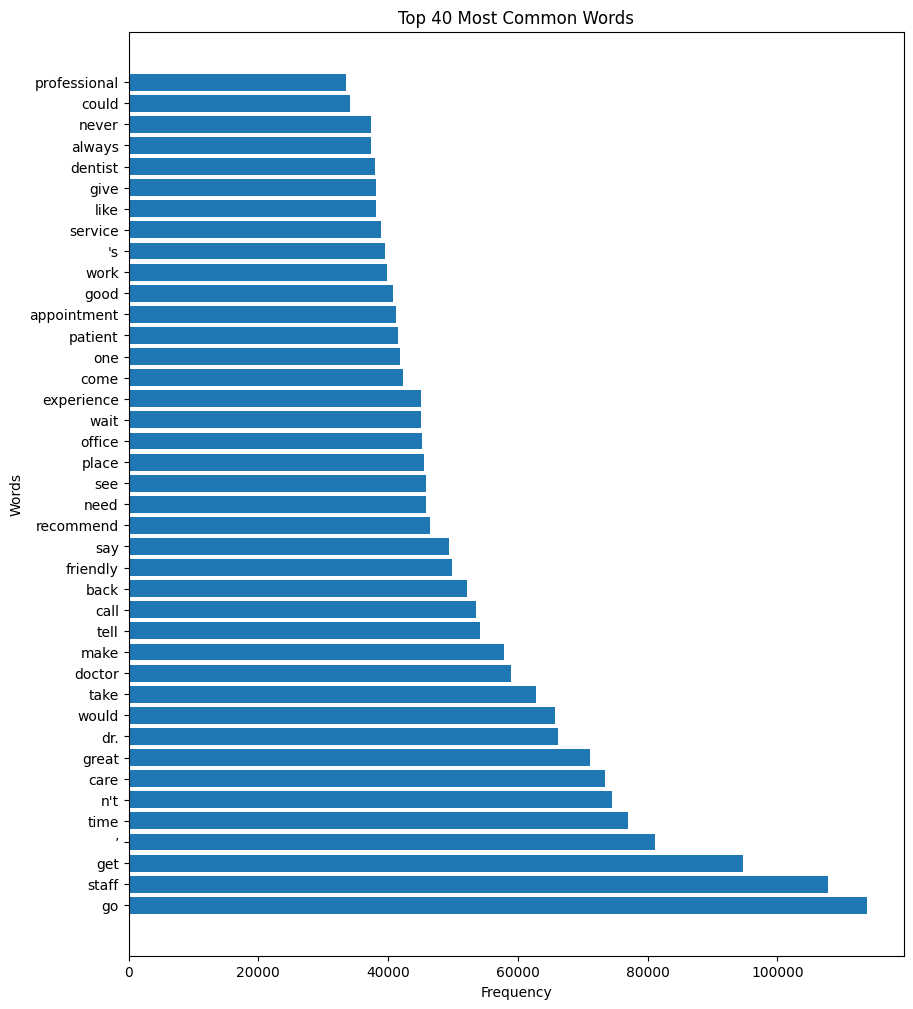

In [20]:
# Visualize most common words
fig, ax = plt.subplots(figsize = (10,12))
ax.barh([word for (word, count) in top_words], [count for (word, count) in top_words])
ax.set_xlabel('Frequency')
ax.set_ylabel('Words')
ax.set_title('Top 40 Most Common Words')
plt.show()

the cleaned text still have symbols like apostrophe, and contractions like n't, or 's.  
it is because NLTK stopword list doesnt always include variations of contractions like = 're, 's, 'll,'n't  
contractions like don't become do and n't after tokenization. if its not handled explicity, it will remain  
to solve it, import contractions library

In [ ]:
#%pip install contractions

Note: you may need to restart the kernel to use updated packages.Collecting contractions
  Using cached contractions-0.1.73-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached textsearch-0.0.24-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached anyascii-0.3.2-py3-none-any.whl.metadata (1.5 kB)
Using cached contractions-0.1.73-py2.py3-none-any.whl (8.7 kB)
Using cached textsearch-0.0.24-py2.py3-none-any.whl (7.6 kB)
Using cached anyascii-0.3.2-py3-none-any.whl (289 kB)




[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\eliza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [22]:
import contractions
from nltk.corpus import stopwords

# Define custom stopwords to remove residual terms like 's, n't, dr
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(["'","dr.","'s", "n't", "'re", "'ll", "dr", "mr", "mrs", "'d"])

# Apply contraction expansion, remove custom stopwords, and clean text
def clean_final_text(text):
    # Expand contractions
    text = contractions.fix(text)
    # Remove custom stopwords
    text = ' '.join([word for word in text.split() if word not in custom_stopwords])
    return text

# Apply the cleaning function to the final preprocessed text
text_df['final_cleaned_text'] = text_df['nltk_final_cleaned_text'].apply(clean_final_text)

**Reapply the common word counts again**

[('go', 113746), ('staff', 107820), ('get', 94740), ('’', 81101), ('time', 77014), ('care', 73496), ('great', 71057), ('would', 69733), ('take', 62847), ('doctor', 58878), ('make', 57850), ('tell', 54200), ('call', 53597), ('back', 52226), ('friendly', 49786), ('say', 49395), ('recommend', 46469), ('need', 45882), ('see', 45871), ('place', 45554), ('office', 45181), ('wait', 45134), ('experience', 45059), ('come', 42313), ('one', 41798), ('patient', 41509), ('appointment', 41255), ('good', 40793), ('work', 39866), ('service', 38882), ('like', 38170), ('give', 38121), ('dentist', 37932), ('always', 37384), ('never', 37356), ('could', 34588), ('professional', 33522), ('year', 33471), ('even', 33432), ('day', 31416)]


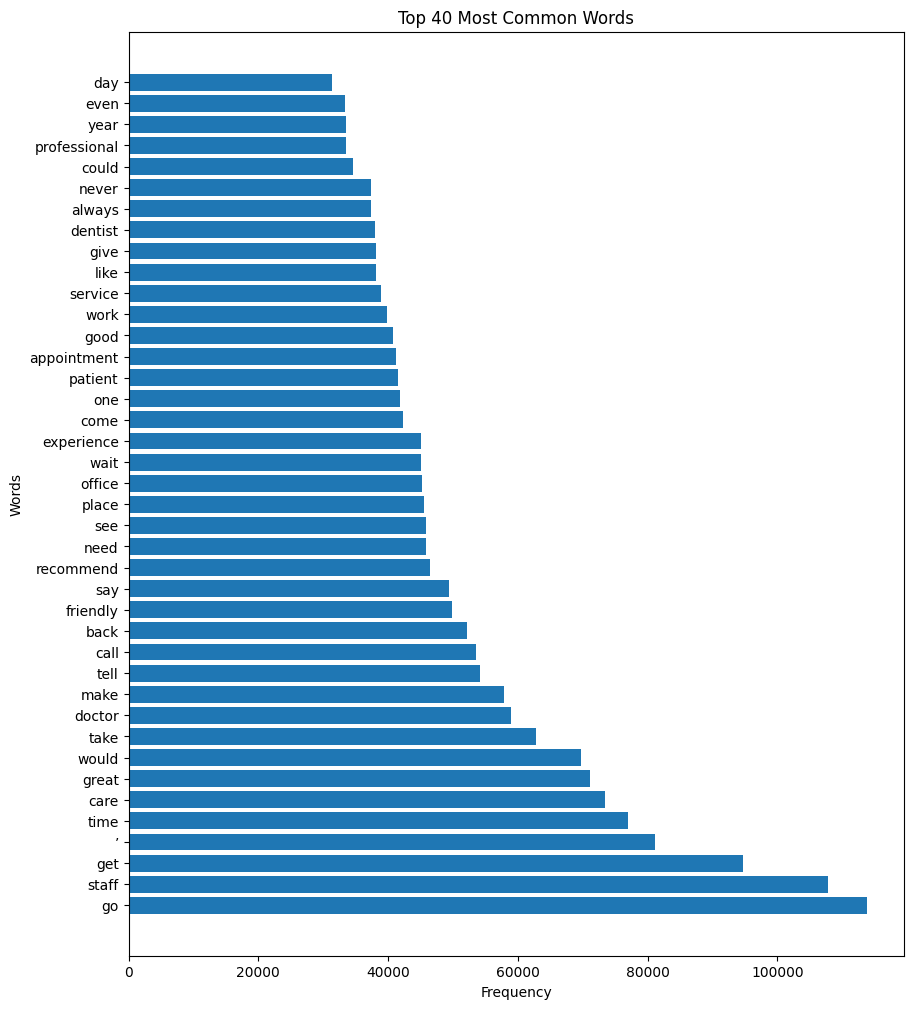

In [23]:
all_words = ' '.join(text_df['final_cleaned_text']).split()
word_counts = Counter(all_words)
top_words = word_counts.most_common(40)
print(top_words)
# Visualize most common words
fig, ax = plt.subplots(figsize = (10,12))
ax.barh([word for (word, count) in top_words], [count for (word, count) in top_words])
ax.set_xlabel('Frequency')
ax.set_ylabel('Words')
ax.set_title('Top 40 Most Common Words')
plt.show()

**create word cloud**

In [ ]:
#pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\eliza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


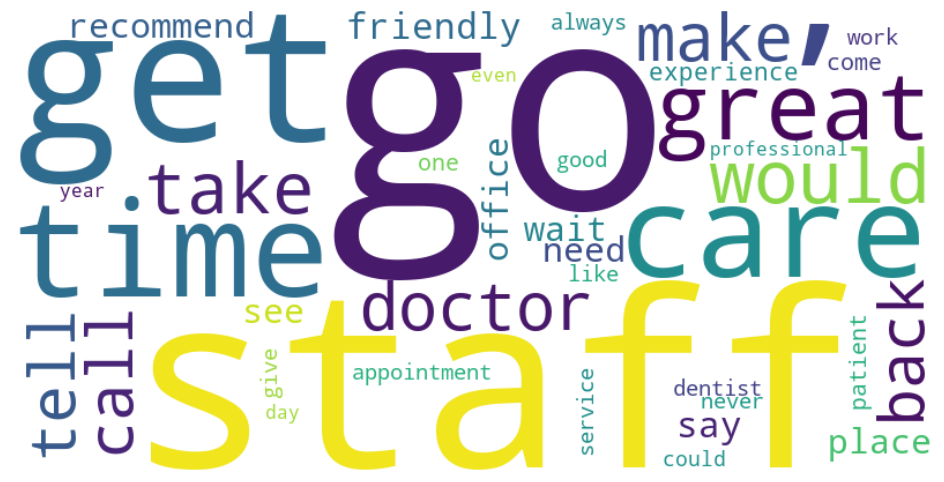

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud
wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white').generate_from_frequencies(dict(top_words))

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



# **SENTIMENT LABELING**

**1. VADER**

In [26]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to classify the sentiment of a review
def get_sentiment(review):
    scores = sia.polarity_scores(review)
    sentiment_score = scores['compound']
    if sentiment_score > 0.1:
        return 'positive'
    elif sentiment_score < -0.1:
        return 'negative'
    else:
        return 'neutral'
    
# Apply function on dataset copy
vader_sentiment = text_df.copy()
vader_sentiment['Predicted_Sentiment'] = vader_sentiment['text'].apply(get_sentiment)

# Print the number of positive, negative, and neutral reviews
print("Number of positive reviews:", len(vader_sentiment[vader_sentiment['Predicted_Sentiment'] == 'positive']))
print("Number of negative reviews:", len(vader_sentiment[vader_sentiment['Predicted_Sentiment'] == 'negative']))
print("Number of neutral reviews:", len(vader_sentiment[vader_sentiment['Predicted_Sentiment'] == 'neutral']))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\eliza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Number of positive reviews: 216420
Number of negative reviews: 64712
Number of neutral reviews: 15155


In [27]:
# Map the rating column to create new column true sentiment
vader_sentiment['True_Sentiment'] = vader_sentiment['rating'].map({1: 'negative', 
                                           2: 'negative', 
                                           3: 'neutral', 
                                           4: 'positive', 
                                           5: 'positive'})

In [35]:
%pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.2/11.1 MB 4.8 MB/s eta 0:00:03
   - -------------------------------------- 0.4/11.1 MB 5.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.1 MB 7.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.4/11.1 MB 8.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.1 MB 8.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.1 MB 8.9 MB/s eta 0:00:01
   ---------- ----------------------------- 2.9/11.1 MB 9.2 MB/s eta 0:00:01
   ----------- ---------------------------- 3.3/11.1 MB 9.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.1 MB 9.6 MB/s eta 0:00:01
   -------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\eliza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [31]:
import sys
print(sys.executable)

C:\Users\eliza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


In [32]:
import sys
!{sys.executable} -m pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

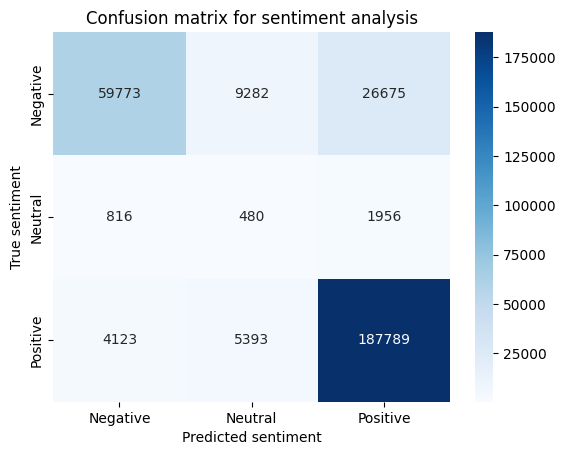

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(vader_sentiment['True_Sentiment'], vader_sentiment['Predicted_Sentiment'])

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.title('Confusion matrix for sentiment analysis')
plt.show()

In [38]:
from sklearn.metrics import classification_report


print("\nClassification report:\n", classification_report(vader_sentiment['True_Sentiment'], 
                                                          vader_sentiment['Predicted_Sentiment']))


Classification report:
               precision    recall  f1-score   support

    negative       0.92      0.62      0.75     95730
     neutral       0.03      0.15      0.05      3252
    positive       0.87      0.95      0.91    197305

    accuracy                           0.84    296287
   macro avg       0.61      0.57      0.57    296287
weighted avg       0.88      0.84      0.85    296287



In [39]:
vader_sentiment.to_csv("vader_sentiment_labeling.csv")

**2. TEXTBLOB**

In [40]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\eliza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [41]:
from textblob import TextBlob
# Function to classify sentiment using TextBlob
def get_textblob_sentiment(review):
    if isinstance(review, str):
        polarity = TextBlob(review).sentiment.polarity
        if polarity > 0.1:
            return 'positive'
        elif polarity < -0.1:
            return 'negative'
        else:
            return 'neutral'
    return 'neutral'  # Handle missing or non-string data gracefully
textblob_sentiment = text_df.copy()
textblob_sentiment['Predicted_Sentiment'] = textblob_sentiment['text'].apply(get_textblob_sentiment)

# Print the number of positive, negative, and neutral reviews
print("Number of positive reviews:", len(textblob_sentiment[textblob_sentiment['Predicted_Sentiment'] == 'positive']))
print("Number of negative reviews:", len(textblob_sentiment[textblob_sentiment['Predicted_Sentiment'] == 'negative']))
print("Number of neutral reviews:", len(textblob_sentiment[textblob_sentiment['Predicted_Sentiment'] == 'neutral']))


Number of positive reviews: 206508
Number of negative reviews: 33188
Number of neutral reviews: 56591


In [43]:
# Map the rating column to create new column true sentiment
textblob_sentiment['True_Sentiment'] = textblob_sentiment['rating'].map({1: 'negative', 
                                           2: 'negative', 
                                           3: 'neutral', 
                                           4: 'positive', 
                                           5: 'positive'})

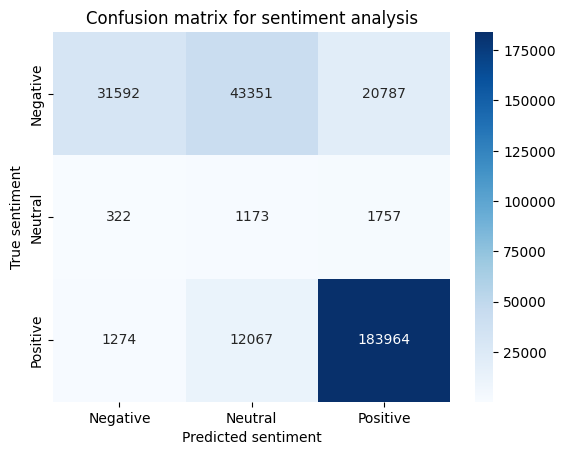

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(textblob_sentiment['True_Sentiment'], textblob_sentiment['Predicted_Sentiment'])

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.title('Confusion matrix for sentiment analysis')
plt.show()

In [45]:
from sklearn.metrics import classification_report


print("\nClassification report:\n", classification_report(textblob_sentiment['True_Sentiment'], 
                                                          textblob_sentiment['Predicted_Sentiment']))


Classification report:
               precision    recall  f1-score   support

    negative       0.95      0.33      0.49     95730
     neutral       0.02      0.36      0.04      3252
    positive       0.89      0.93      0.91    197305

    accuracy                           0.73    296287
   macro avg       0.62      0.54      0.48    296287
weighted avg       0.90      0.73      0.77    296287



In [55]:
textblob_sentiment.to_csv("textblob_sentiment_labeling.csv")

**3. BERT**

In [46]:
pip install transformers torch

  Using cached transformers-4.49.0-py3-none-any.whl.metadata (44 kB)
  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached tokenizers-0.21.0-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached transformers-4.49.0-py3-none-any.whl (10.0 MB)
   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   ---------------------------------------- 0.4/204.2 MB 8.1 MB/s eta 0:00:26
   ---------------------------------------- 0.8/204.2 MB 8.1 MB/s eta 0:00:26
   ---------------------------------------- 1.0/204.2 MB 8.1 MB/s eta 0:00:26
   ---------------------------------------- 1.6/204.2 MB 9.0 MB/s eta 0:00:23
   ---------------------------------------- 2.0/204.2 MB 9.1 MB/s eta 0:00:23
   -


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\eliza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [48]:
from transformers import pipeline
import pandas as pd

In [49]:
#load bert sentiment analysis pipeline
bert_classifier = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\eliza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\eliza\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-

In [50]:
# Function to predict sentiment using BERT
def get_bert_sentiment(review):
    if isinstance(review, str) and review.strip():
        result = bert_classifier(review)[0]
        label = result['label'].lower()
        
        # Convert labels to match your format
        if label == 'positive':
            return 'positive'
        elif label == 'negative':
            return 'negative'
        else:
            return 'neutral'  # Optional, based on the model's output
    return 'neutral'  # Handle empty or missing data


In [51]:
# Apply the BERT sentiment analysis function
bert_sentiment = text_df.copy()
bert_sentiment['Predicted_Sentiment'] = bert_sentiment['text'].apply(get_bert_sentiment)


Token indices sequence length is longer than the specified maximum sequence length for this model (726 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (726) must match the size of tensor b (512) at non-singleton dimension 1

**CHUNKING**

In [54]:
from transformers import pipeline

# Load the BERT sentiment analysis pipeline
bert_classifier = pipeline("sentiment-analysis", truncation=True)

# Function to split long text into smaller chunks
def split_text(text, max_tokens=512):
    words = text.split()
    return [' '.join(words[i:i + max_tokens]) for i in range(0, len(words), max_tokens)]

# Function to analyze sentiment for each chunk and decide the final sentiment
def get_sentiment_for_chunks(text):
    # Split the text into smaller chunks
    chunks = split_text(text)

    # Perform sentiment analysis for each chunk
    sentiments = [bert_classifier(chunk)[0]['label'] for chunk in chunks]
    
    # Decide the final sentiment using majority voting
    return max(set(sentiments), key=sentiments.count)

# Apply the sentiment analysis function to the DataFrame
bert_sentiment = text_df.copy()
bert_sentiment['Predicted_Sentiment'] = bert_sentiment['text'].apply(get_sentiment_for_chunks)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


KeyboardInterrupt: 

In [ ]:
print("Number of positive reviews:", len(bert_sentiment[bert_sentiment['Predicted_Sentiment'] == 'positive']))
print("Number of negative reviews:", len(bert_sentiment[bert_sentiment['Predicted_Sentiment'] == 'negative']))
print("Number of neutral reviews:", len(bert_sentiment[bert_sentiment['Predicted_Sentiment'] == 'neutral']))


vader exploration

In [58]:
print(vader_sentiment['Predicted_Sentiment'].value_counts())

Predicted_Sentiment
positive    216420
negative     64712
neutral      15155
Name: count, dtype: int64


C:\Users\eliza\AppData\Local\Temp\ipykernel_19980\2453058262.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted_Sentiment', data=vader_sentiment, palette='pastel')


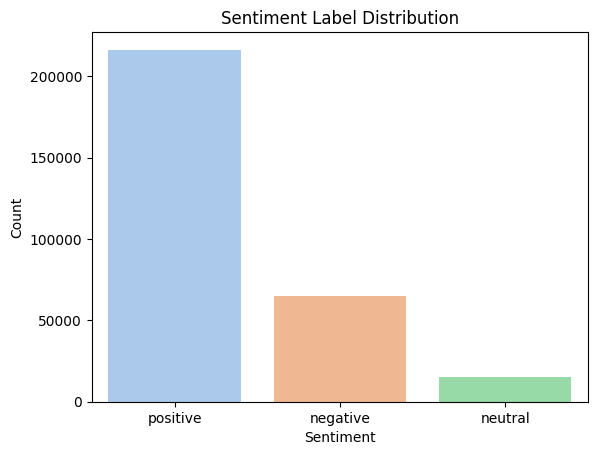

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Predicted_Sentiment', data=vader_sentiment, palette='pastel')
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

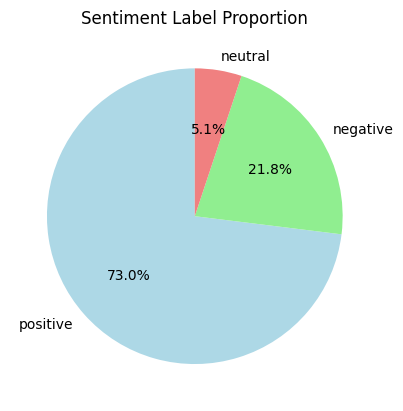

In [60]:
vader_sentiment['Predicted_Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Sentiment Label Proportion')
plt.ylabel('')
plt.show()


In [61]:
print(vader_sentiment['Predicted_Sentiment'].value_counts(normalize=True) * 100)


Predicted_Sentiment
positive    73.044042
negative    21.840985
neutral      5.114973
Name: proportion, dtype: float64
